<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/logo_CV.jpeg" style="width:1500px;heigth:100px">


# <center> 09. Baw of Visual words </center>



## <span style="color:red"> Outline </span> 
1. **Why local description from features?**
2. **Principles of BoW**
3. **Learning a Dictionary**
4. **Building a ocurrence word descriptor**

In [1]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## <span style="color:green"> If you are in colaboratoy </span>: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student/notebooks
!pwd

## <span style="color:red"> 1. Why local description from features? </span>

### Global representation can't deal with vaiance representation problems...

| | |
|:-------------------------:|:-------------------------:|
|<img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_1.png"> |  <img width="300px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_2.png">|
|<img width="200px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_3.png">  |  <img width="200px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_4.png">|
<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_5.png">  

##### Which is the **idea** ? : to use local features without any spatial order to represent objects. 

## <span style="color:red"> 2. Principles of BoW </span> 

| | |
|:-------------------------:|:-------------------------:|
|<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_7.png"> |  <img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_10.png">|

The idea come from **Text analysis**. Basically we can infer the main idea of document by counting **ocurrence of words** in the text. 

- There is not taking into account the word order in original text
- The ocurrence is obtained with respect to a **Dictionary**
- Largest word ocurrence represent **Keywords of text**


## <span style="color:orange"> 1. student Challenge</span>: 

### How to use this principle on image recognition?


__________________________________________________________________________________________________________
__________________________________________________________________________________________________________
__________________________________________________________________________________________________________
__________________________________________________________________________________________________________

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_6.png">  

### <span style="color:green"> Welcome to Bag of Features ! </span>

1. Define **visual words** that in our case will be **ORB FEATURES**
2. Built a **Visual word dictionary**
3. **Image descriptor**: a **Histogram** of visual word ocurrences for a particular image
4. Classify the **Image descriptor** using any classifier. Classically it is used SVM

## <span style="color:red"> 3. Visual Words: ORB Features </span> 

In **Bag of Features** the words are local representative features, that cold be robust to geometric transformation and could be found in other images of the same **category**. The ORB features could be used as **visual words**

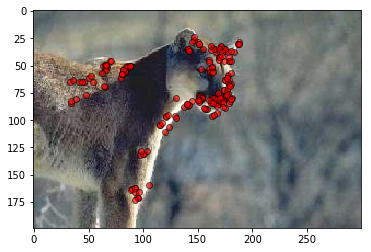

In [2]:
from skimage import io
from skimage.color import rgb2gray
import cv2 as cv
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
import matplotlib.pyplot as plt

img_test1 =io.imread('../data/image_set/cougar_body/image_0025.jpg')
descriptor_extractor = ORB(n_keypoints=200)
descriptor_extractor.detect_and_extract(rgb2gray(img_test1))
descriptors1 = descriptor_extractor.descriptors
keypoints1 = descriptor_extractor.keypoints

plt.imshow(img_test1); 
plt.scatter(keypoints1[:,1], keypoints1[:,0],c= "red",edgecolors="black", alpha=.6);

(200, 256)


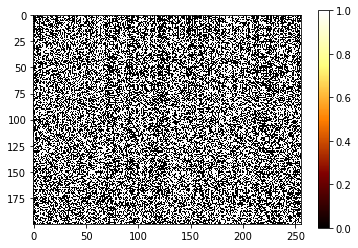

In [3]:
print descriptors1.shape
fig, ax = plt.subplots()
cax = ax.imshow(descriptors1, interpolation='nearest',  cmap=plt.cm.afmhot)
cbar = fig.colorbar(cax)
plt.show()

## <span style="color:orange"> 2. student Challenge</span>: 

- Built an array (`array_imgs`) with  images paths of whole dataset: `"class_name + img_example"`
    - For instance: an element of the array is: `cougar_body/image_0021.jpg`

In [19]:
path_classes = '../data/image_set/'
classes_names = os.listdir(path_classes)
print classes_names[0:5]
classes_names = classes_names[0:5]

# Cod


print array_imgs[0], array_imgs.shape

['cougar_body', 'chair', 'car_side', 'elephant', 'accordion']
351
cougar_body/image_0021.jpg (351,)


- Then, permute the array `array_imgs` and split-up the set on **training (80 %)** and **test (20%)**
    - From training set (`array_imgs_train`), we will built the dictionary and training descriptors
    - From test set (`array_imgs_test`), we well built the test descriptor and obtain a performance of the approach

In [ ]:
# Cod




print array_imgs_train.shape, array_imgs_test.shape
print array_imgs_train.shape[0]+ array_imgs_test.shape[0]
print array_imgs_test[0]

## <span style="color:red"> 4. Learning a Dictionary </span> 

What we do with many "patches" or visual features of multiple categories?

   - we first **LEARN** a dictionary! 
   
<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_8.png">  



1. We take from training set the set of visual words.
2. We cluster the computed training visual words: A **k-means** is typically used. 
3. We define the centroids as the **DICTIONARY**

| | |
|:-------------------------:|:-------------------:|
|<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_11.png"> |  <img width="200px" src="../imgs/BoW_12.png">|


## <span style="color:orange"> 3. student Challenge</span>: 

- for each image (on training set), compute ORB-features (n_keypoints=200)
- concatenate all the ORB features **without distintion of categories**


In [21]:
import gc

path_classes = '../data/image_set/'
descriptor_extractor = ORB(n_keypoints=200)



# Cod ...


    
gc.collect() # explicitelly clean memory

print array_ORB.shape

(56000, 256)


## Visual dictionary from K_MEANS

- **clustering your data points into a number (K) of mutually exclusive clusters.**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/kmeans.gif" style="width:300px;">

-**How it works ?**


1. Initialize $K$ centroids $C = \{c_1, c_2, \ldots c_k\}$
    - The center points are vectors of the same length $c_i \in \mathbb{R}^{F}$
2. Each data point is classified by computing the distance between that point and each group center
    - $\arg \min_{c_i \in C} dist(c_i, x)^{2}$
3. Based on these classified points, we recompute the group center by taking the mean of all the vectors in the group.
    -$c_i = \frac{1}{|c_i|}\sum_{x_i \in c_i} x_i$

4. Repeat these steps for a set number of iterations or until the group centers don’t change much between iterations. 



## <span style="color:orange"> 4. student Challenge</span>: 
- Built a visual dictionary applying  K-means on: `array_ORB`
- Test with a K=70

In [77]:
from sklearn.cluster import KMeans
v_words =70

# Cod ...


print visual_dictionary.shape

(70, 256)


## <span style="color:red"> 4. Building a ocurrence word descriptor </span> 

Then, we quantize visual representation by **counting** the set of patches that exist on an image given the learned dictionary. 

- So, an image is a **representation of frequencies of visual words**


<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_9.png">  

Some examples to recognize texture: 

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/BoW_13.png">  

In [78]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

(70,)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3948486190>,
 <Container object of 70 artists>,
 None)

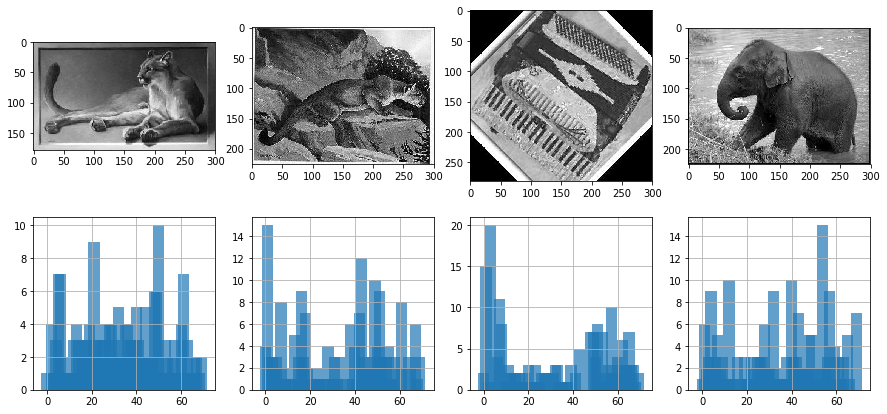

In [79]:
#Histogram example for two images

I_cat1 = cv.imread('../data/image_set/cougar_body/image_0010.jpg',0) 
I_cat2 = cv.imread('../data/image_set/cougar_body/image_0016.jpg',0) 
I_ele1 = cv.imread('../data/image_set/accordion/image_0003.jpg',0) 
I_ele2 = cv.imread('../data/image_set/elephant/image_0016.jpg',0) 


descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(I_cat1)
des_cat1 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(I_cat2)
des_cat2 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(I_ele1)
des_ele1 = descriptor_extractor.descriptors
descriptor_extractor.detect_and_extract(I_ele2)
des_ele2 = descriptor_extractor.descriptors

h_cat1 = build_histogram(des_cat1, kmeans)
h_cat2 = build_histogram(des_cat2, kmeans)
h_ele1 = build_histogram(des_ele1, kmeans)
h_ele2 = build_histogram(des_ele2, kmeans)

print h_cat1.shape

plt.figure(figsize=(15,7))
plt.subplot(241), plt.imshow(I_cat1,'gray')
plt.subplot(242), plt.imshow(I_cat2,'gray')
plt.subplot(243), plt.imshow(I_ele1,'gray')
plt.subplot(244), plt.imshow(I_ele2,'gray')
plt.subplot(245), plt.bar( range(v_words), h_cat1,alpha=0.7, width=5,), plt.grid(True)
plt.subplot(246), plt.bar( range(v_words), h_cat2,alpha=0.7, width=5,), plt.grid(True)
plt.subplot(247), plt.bar( range(v_words), h_ele1,alpha=0.7, width=5,), plt.grid(True)
plt.subplot(248), plt.bar( range(v_words), h_ele2,alpha=0.7, width=5,), plt.grid(True)



## <span style="color:orange"> 5. student Challenge</span>: 
- Compute all the Histograms for training set, that will be used to train a machine learning algorithm
- Compute all the Histograms for test set
- In both cases create the `y` vector with corresponding labels as `int_type`. 

In [80]:
print classes_names
dic_classes = {}
for index, name in enumerate(classes_names):
    dic_classes[name] = index+1   

['cougar_body', 'chair', 'car_side', 'elephant', 'accordion']


In [81]:
import gc



# Cod ....




print arr_h_test.shape, arr_h_train.shape, ya_train.shape, ya_test.shape

(71, 70) (280, 70) (280,) (71,)


Now, we can use machine learning algorithms to train ans test the **visual word occurrence descriptors**

In [82]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

GN_est = GaussianNB()
RF_est = RandomForestClassifier(n_estimators=40)
SV_est = SVC(kernel='rbf')
KN_est = KNeighborsClassifier(n_neighbors=10)

With a K-nearest classifier

0.605633802817


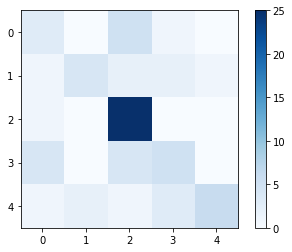

In [83]:
KN_est.fit(arr_h_train, ya_train)
KN_pr = KN_est.predict(arr_h_test)
print KN_est.score(arr_h_test, ya_test)
cm_test = confusion_matrix(ya_test, KN_pr)

plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

## <span style="color:orange"> 6. student Challenge</span>: 

- Do the same for other classifiers. 


In [ ]:
# With Naive Gaussian Classifier




With Naive Random Forest

In [ ]:
# With Random Forest




With Suppor Vector Machine

In [ ]:
# With Support vector Machine





## <span style="color:orange"> 7. student Challenge</span>: 

- Which is the best number of words in Dictionary ?
- Which are the other parameters for tunning ?
- How do you believe that can be obtained better results?

# References

[[1](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.453.5924&rep=rep1&type=pdf)] Understanding Bag-of-Words Model: A Statistical Framework. 

[2] BRIEF ORB: Rublee, Ethan; Rabaud, Vincent; Konolige, Kurt; Bradski, Gary (2011). "ORB: an efficient alternative to SIFT or SURF" (PDF). IEEE International Conference on Computer Vision (ICCV).



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">